## ID5
This Jupyter notebook shows the application of the ID5 class and its functions.

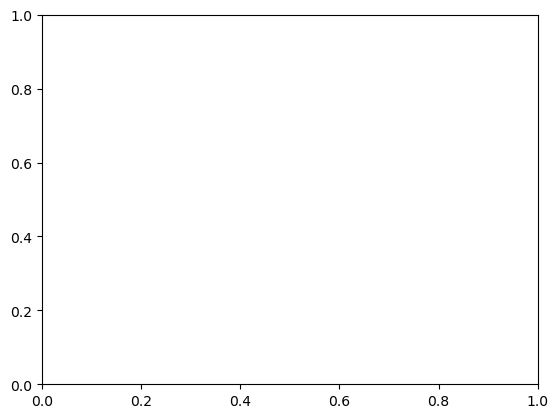

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from src import devices as blab
from scipy import optimize

FRET measurements use emission and excitation wavelengths. These are not completely or incorrectly exported when writing the ID5 files. To use these values in the FRET calculation, they are passed to the ID5 class in a dictionary.

If the file has been successfully loaded, the measurements that have been read in will be displayed.
The measurements are named with "measurement_" and a consecutive number.

In [2]:
wavelength_pairs = {
    "Dex_Dem": [530, 595],
    "Dex_Aem": [530, 660],
    "Aex_Aem": [630, 660]
}
my_id5_data = blab.ID5("src/id5_data/2023-05-22_NaCl-titration_VS.txt", wavelength_pairs)

Measurement_1 = FRET_21°C: Endpoint, Fluorescence
Measurement_2 = FRET_23°C: Endpoint, Fluorescence
Measurement_3 = FRET_25°C: Endpoint, Fluorescence
Measurement_4 = FRET_27°C: Endpoint, Fluorescence
Measurement_5 = FRET_29°C: Endpoint, Fluorescence
Measurement_6 = FRET_31°C: Endpoint, Fluorescence
Measurement_7 = FRET_33°C: Endpoint, Fluorescence
Measurement_8 = FRET_35°C: Endpoint, Fluorescence
Measurement_9 = FRET_37°C: Endpoint, Fluorescence
Measurement_10 = FRET_39°C: Endpoint, Fluorescence
Measurement_11 = FRET_41°C: Endpoint, Fluorescence
Measurement_12 = FRET_43°C: Endpoint, Fluorescence
Measurement_13 = FRET_45°C: Endpoint, Fluorescence
Measurement_14 = FRET_47°C: Endpoint, Fluorescence
Measurement_15 = FRET_49°C: Endpoint, Fluorescence
Measurement_16 = FRET_51°C: Endpoint, Fluorescence
Measurement_17 = FRET_53°C: Endpoint, Fluorescence
Measurement_18 = FRET_55°C: Endpoint, Fluorescence
Measurement_19 = FRET_57°C: Endpoint, Fluorescence
Measurement_20 = FRET_59°C: Endpoint, Fl

## How do I get access to my data?

The measurements are kept in the attribute "measurements" of the variable "my_id5_data".
This is simply a dictionary that contains all measurements.

The following code is used to gain access to the first measurement.

In [3]:
print(my_id5_data.measurements["Measurement_1"])

When accessing measurement 1, the result appears unusual. This is due to the fact that the measurements are saved as objects.
Objects are, in a nutshell, complex variables. They have attributes such as the measurement's name or the data in a dataframe. Furthermore, the objects include functions that can be used to improve data interaction.
Let us now store the measurement in a new variable and examine the name of the measurement and the data in it. The informations are stored in the "section_name" and "working_df" attribute.

Consider the following:

In [4]:
measure_1 = my_id5_data.measurements["Measurement_1"]
print(f"Name of the Measuremnt = {measure_1.section_name}")
df_of_measurement_1 = measure_1.working_df

df_of_measurement_1

Name of the Measuremnt = FRET_21°C


,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
0,530,595,21.5,A1,3910
1,530,595,21.5,A2,670661
2,530,595,21.5,A3,548059
3,530,595,21.5,A4,1061004
4,530,595,21.5,A5,1016300
...,...,...,...,...,...
211,630,660,21.5,H5,4266
212,630,660,21.5,H6,5750122
213,630,660,21.5,H7,5296
214,630,660,21.5,H8,5189372


## How do I get to a single well?

Through a function of the objects, this is now relatively simple. You simply need to indicate the well you wish to filter when using the method `get_well()`. Because this is a standard pandas DataFrame, the function `get_well()` does not exist in the dataframe "df_of_measurement_1". To access `get_well()`, you have to use the object named measure_1.

In [5]:
df_A3 = measure_1.get_well("A3")
df_A3

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
2,530,595,21.5,A3,548059
74,530,660,21.5,A3,810202
146,630,660,21.5,A3,3444795


## How do you remove the blank?

The program must know two things in order to complete the blank correction :

1. Which of the measurements contain blanks?

2. Which wells were these blanks measured in?

The program will then go through all of the measurements, collecting values from the chosen wells and computing a mean blank.
The values in the "working_df" of the specified measurements are then background corrected.

In [6]:
# creating a list of measurement names
FRET_measurements = []
measure_names = my_id5_data.measurements.keys()
for name in measure_names:
    measurement = my_id5_data.measurements[name]
    name_1 = measurement.section_name
    if "FRET" in name_1:
        FRET_measurements.append(name)
print(FRET_measurements)

#creating a list of wells with blank samples
blank_wells = ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]

#calculating the mean blank and correct the values
mean_blank = my_id5_data.calculate_blank(FRET_measurements, blank_wells)
print(mean_blank)

['Measurement_1', 'Measurement_2', 'Measurement_3', 'Measurement_4', 'Measurement_5', 'Measurement_6', 'Measurement_7', 'Measurement_8', 'Measurement_9', 'Measurement_10', 'Measurement_11', 'Measurement_12', 'Measurement_13', 'Measurement_14', 'Measurement_15', 'Measurement_16', 'Measurement_17', 'Measurement_18', 'Measurement_19', 'Measurement_20', 'Measurement_21', 'Measurement_22', 'Measurement_23']
552
3477.1485507246375


In each defined measurement, the working_df is also modified.  A new column called "bg_corrected_RFU" has been added.

In [7]:
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg_corrected_RFU
0,530,595,21.5,A1,3910,4.328514e+02
1,530,595,21.5,A2,670661,6.671839e+05
2,530,595,21.5,A3,548059,5.445819e+05
3,530,595,21.5,A4,1061004,1.057527e+06
4,530,595,21.5,A5,1016300,1.012823e+06
...,...,...,...,...,...,...
211,630,660,21.5,H5,4266,7.888514e+02
212,630,660,21.5,H6,5750122,5.746645e+06
213,630,660,21.5,H7,5296,1.818851e+03
214,630,660,21.5,H8,5189372,5.185895e+06


## How do I insert new data into a new column?

Each measurement has its own function here as well. The add_new_column function can be used with a dictionary to assign a new value to an already existing value in the dataFrame. For example, in all rows where the column "wellnumber" contains the value "A1," assign the value 10 to a new column "concentration."

In [8]:
# Information about concentration of ions in nM
concentrations = {"A2":0,"B2":1,"C2":2.5,"D2":5, "E2":7.5,"F2":10, "G2":12.5,"H2":25,
            "A3":50,"B3":75,"C3":100,"D3":500,
            "A4":0,"B4":1,"C4":2.5,"D4":5,"E4":7.5,"F4":10, "G4":12.5, "H4":25,
            "A5":50,"B5":75,"C5":100,"D5":500,
            "A6":0,"B6":1, "C6":2.5,"D6":5,"E6":7.5,"F6":10,"G6":12.5,"H6":25,
            "A7":50,"B7":75,"C7":100, "D7":500,
            "A8":0,"B8":1,"C8":2.5, "D8":5, "E8":7.5,"F8":10,"G8":12.5,"H8":25,
            "A9":50,"B9":75,"C9":100,"D9":500
}

# Do it for 1 Measurement:
my_id5_data.measurements["Measurement_1"].add_new_column("wellnumber", concentrations, "concentration (nM)")
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg_corrected_RFU,concentration_nM
0,530,595,21.5,A1,3910,4.328514e+02,NaN
1,530,595,21.5,A2,670661,6.671839e+05,0.0
2,530,595,21.5,A3,548059,5.445819e+05,50.0
3,530,595,21.5,A4,1061004,1.057527e+06,0.0
4,530,595,21.5,A5,1016300,1.012823e+06,50.0
...,...,...,...,...,...,...,...
211,630,660,21.5,H5,4266,7.888514e+02,NaN
212,630,660,21.5,H6,5750122,5.746645e+06,25.0
213,630,660,21.5,H7,5296,1.818851e+03,NaN
214,630,660,21.5,H8,5189372,5.185895e+06,25.0


In [9]:
# Do it for all FRET Measurements
for measurement_name, measurement in my_id5_data.measurements.items():
    if "FRET" in measurement.section_name:
        measurement.add_new_column("wellnumber", concentrations, "concentration (nM)")
#Example print
my_id5_data.measurements["Measurement_9"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg_corrected_RFU,concentraion_nM
0,530,595,37,A1,3466,-1.114855e+01,NaN
1,530,595,37,A2,577470,5.739929e+05,0.0
2,530,595,37,A3,452732,4.492549e+05,50.0
3,530,595,37,A4,851364,8.478869e+05,0.0
4,530,595,37,A5,805148,8.016709e+05,50.0
...,...,...,...,...,...,...,...
211,630,660,37,H5,6070,2.592851e+03,NaN
212,630,660,37,H6,4835381,4.831904e+06,25.0
213,630,660,37,H7,4750,1.272851e+03,NaN
214,630,660,37,H8,4201660,4.198183e+06,25.0


# How do I calculate FRET?

In [2]:
wavelength_pairs = {
        "Dex_Dem": [530, 595],
        "Dex_Aem": [530, 670],
        "Aex_Aem": [630, 670]}

my_id_5_data = blab.ID5("C:/Users/reuss/Documents/GitHub/Visual_FRET/src/id5_data/2023-03-15_Praktikum_FRET3_VS.txt", wavelength_pairs)

Measurement_1 = Korrekturmatrix Flur: Endpoint, Fluorescence
Measurement_2 = Korr.Mat. Cy3: Endpoint, Fluorescence
Measurement_3 = Korr.Mat. Cy5: Endpoint, Fluorescence
Measurement_4 = EmCy3: Spectrum, Fluorescence
Measurement_5 = EmCy5: Spectrum, Fluorescence
Measurement_6 = 20°C: Endpoint, Fluorescence
Measurement_7 = FRET 20 °C: Endpoint, Fluorescence
Measurement_8 = 25°C: Endpoint, Fluorescence
Measurement_9 = FRET 25 °C: Endpoint, Fluorescence
Measurement_10 = 30 °C: Endpoint, Fluorescence
Measurement_11 = FRET 30 °C: Endpoint, Fluorescence
Measurement_12 = 35°C: Endpoint, Fluorescence
Measurement_13 = FRET 35 °C: Endpoint, Fluorescence
Measurement_14 = 40°C: Endpoint, Fluorescence
Measurement_15 = FRET 40 °C: Endpoint, Fluorescence
Measurement_16 = 43°C: Endpoint, Fluorescence
Measurement_17 = FRET 43°C: Endpoint, Fluorescence
Measurement_18 = 45°C: Endpoint, Fluorescence
Measurement_19 = FRET 45 °C: Endpoint, Fluorescence
Measurement_20 = 47°C: Endpoint, Fluorescence
Measurement

In [10]:
# creating a list of wells with blank samples
blank_wells = ["A5", "B5", "C5", "D5", "E5", "F5", "G5", "H5"]

FRET_measurements = []
measure_names = my_id_5_data.measurements.keys()
for name in measure_names:
        measurement = my_id_5_data.measurements[name]
        name_1 = measurement.section_name
        if "FRET" in name_1:
                FRET_measurements.append(name)
print(f"FRET-Measurements:\n {FRET_measurements}")

# calculating the mean blank and correct the values
mean_blank = my_id_5_data.calculate_blank(FRET_measurements, blank_wells)
my_id_5_data.measurements["Measurement_7"].working_df

The FRET-Measurements:
 ['Measurement_7', 'Measurement_9', 'Measurement_11', 'Measurement_13', 'Measurement_15', 'Measurement_17', 'Measurement_19', 'Measurement_21', 'Measurement_23', 'Measurement_25', 'Measurement_27']


,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,FRET
0,530,595,21.5,A5,-2098.375,-2098.375,0.759041
1,530,595,21.5,A6,32343.625,32343.625,-2.742321
2,530,595,21.5,A7,1794497.625,1794497.625,0.304241
3,530,595,21.5,A8,1691371.625,1691371.625,0.095668
4,530,595,21.5,B5,-1901.375,-1901.375,-55.161104
...,...,...,...,...,...,...,...
59,530,670,21.5,G8,-1275.875,-1275.875,2.409101
60,530,670,21.5,H5,-827.875,-827.875,1.137777
61,530,670,21.5,H6,-1490.875,-1490.875,2.200532
62,530,670,21.5,H7,2961982.125,2961982.125,0.173477


In [4]:
cm_cy3 = my_id_5_data.calculate_correction_matrix(measurement_cy3="Measurement_1", measurement_cy5="Measurement_2", wellnumber="A5")
cm_cy3

,Ex/Em,em_595,em_670
0,ex_530,-399.5,-259.5
1,ex_530,0.0,-4847.0


In [5]:
cm_cy5 = my_id_5_data.calculate_correction_matrix("Measurement_1", "Measurement_2", "B5")
cm_cy5

,Ex/Em,em_595,em_670
0,ex_530,399.5,259.5
1,ex_530,0.0,4847.0


In [6]:
bt_d = my_id_5_data.calculate_bleedthrough(cm_cy3, "D")
bt_a = my_id_5_data.calculate_bleedthrough(cm_cy5, "A")

de_d = my_id_5_data.calculate_directExcitation(cm_cy3, "D")
de_a = my_id_5_data.calculate_directExcitation(cm_cy5, "A")

You chose donor bleedthrough calculations.
Bleedthrough of donor: 0.6496 (64.96%). 

You chose acceptor bleedthrough calculations.
Division with zero encountered. It is what it is.
Bleedthrough of Acceptor set to zero. 

You chose donor direct excitation calculations.
Divide by zero encountered. It is what it is.
Direct excitation of donor set to zero. 

You chose acceptor direct excitation calculations.
Direct Excitation of Acceptor: 0.0535 (5.35%). 



In [7]:
fret = my_id_5_data.calculate_FRET(FRET_measurements, cm_cy5, bt_d, de_a)
my_id_5_data.measurements["Measurement_7"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,FRET
0,530,595,21.5,A5,-2098.375,-2098.375,0.759041
1,530,595,21.5,A6,32343.625,32343.625,-2.742321
2,530,595,21.5,A7,1794497.625,1794497.625,0.304241
3,530,595,21.5,A8,1691371.625,1691371.625,0.095668
4,530,595,21.5,B5,-1901.375,-1901.375,-55.161104
...,...,...,...,...,...,...,...
59,530,670,21.5,G8,-1275.875,-1275.875,2.409101
60,530,670,21.5,H5,-827.875,-827.875,1.137777
61,530,670,21.5,H6,-1490.875,-1490.875,2.200532
62,530,670,21.5,H7,2961982.125,2961982.125,0.173477
